## Module 4A
## Tutorial 4 covers generating spharm-obj organelle models, creating reports from them, and comparing them.
## Module 4A generates an organelle model from only one image to reduce compute time.  It also generates plots showing the organelle shape and spatial distribution.
## Module 4B uses existing, larger models so Module 4A can be skipped if desired. 

In [1]:
from cellorganizer.tools import img2slml
import glob
import os
#import urllib.request
#import tarfile 

module_name = "Module4A" #the folder in results that will hold everything

model_name = "Module4A"
topdir = "/home/murphylab/cellorganizer/local/results"
outputdir = topdir + "/" + module_name
if not os.path.exists(topdir):
    os.makedirs(topdir)
os.chdir(topdir)
if not os.path.exists(outputdir):
    os.makedirs(outputdir)
os.chdir(outputdir)

# init
options = {}
dnaImagesDirectoryPath = []
cellImagesDirectoryPath = []
options["masks"] = []
proteinImagesDirectoryPath = []
directory = '/home/murphylab/cellorganizer/local/images/HeLa/3D/processed/'

# get images
file_pattern = 'LAM_cell1?_mask_t1.tif'
for name in glob.glob(directory + file_pattern):
    options["masks"].append(name)

file_pattern = 'LAM_cell1?_ch1_t1.tif'
for name in glob.glob(directory + file_pattern):
    cellImagesDirectoryPath.append(name)
    
file_pattern = 'LAM_cell1?_ch0_t1.tif'
for name in glob.glob(directory + file_pattern):
    dnaImagesDirectoryPath.append(name)

file_pattern = 'LAM_cell1?_ch2_t1.tif'
for name in glob.glob(directory + file_pattern):
    proteinImagesDirectoryPath.append(name)
    
cellImagesDirectoryPath.sort()
dnaImagesDirectoryPath.sort()
proteinImagesDirectoryPath.sort()
options["masks"].sort()

# just use 1 cell since each cell has ~100 lysosomes; comment out these 4 lines to use all images
cellImagesDirectoryPath = cellImagesDirectoryPath[0:1]
dnaImagesDirectoryPath = dnaImagesDirectoryPath[0:1]
proteinImagesDirectoryPath = proteinImagesDirectoryPath[0:1]
options["masks"] = options["masks"][0:1]

# setup_everything:
#options['options_spharm'] = options_spharm
options['verbose'] = 0

#parameter for spharm 
#options['options_spharm.is_demo'] = 1
options['options_spharm.verbose'] = 1
#options['options_spharm.debug'] = 1
options['options_spharm.display'] = 0
options['options_spharm.train.flag'] = 'cell'
options['options_spharm.cell.class'] = 'cell_membrane'
options['options_spharm.cell.type'] = 'spharm_rpdm'
# postprocess of parameterization: alignment
options['options_spharm.model.spharm_rpdm.postprocess'] = 1
options['options_spharm.model.resolution'] = [0.049, 0.049, 0.2000]
options['options_spharm.downsampling'] = [1,1,1]
options['options_spharm.model.filename'] = 'objects.xml'
options['options_spharm.model.id'] = 'objects'
options['options_spharm.model.name'] = 'objects'
options['options_spharm.nucleus.name'] = 'objects'
options['options_spharm.cell.model'] = 'objects'
# degree of the descriptor
options['options_spharm.model.spharm_rpdm.maxDeg'] = 31
# cellular components: either {'cell'}, {'nuc'}, or {'cell', 'nuc'}
options['options_spharm.model.spharm_rpdm.components'] = {'cell'}
options['spharm_rpdm.components'] = {'cell'}
# latent dimension for the model
options['options_spharm.model.spharm_rpdm.latent_dim'] = 15
# alignment method: 'major_axis' or 'foe'
options['options_spharm.model.spharm_rpdm.alignment_method'] = 'major_axis'
# plane of rotation: 'xy' 'yz', 'xz' or 'xyz'
options['options_spharm.model.spharm_rpdm.rotation_plane'] = 'xyz'
# documentation
options['options_spharm.documentation.description'] = 'This model has been trained for shape-location protein model from CellOrganizer'
options['options_spharm.model.spharm_rpdm.segminnucfraction'] = 0.1
options['options_spharm.verbose'] = 1
options['options_spharm.spharm_rpdm.NMcost_tol'] = 0.0000001
options['options_spharm.spharm_rpdm.NMlargr_tol'] = 0.0000001
options['options_spharm.spharm_rpdm.NMfirsttry_maxiter'] = 300
options['options_spharm.spharm_rpdm.NMretry_maxiter'] = 100
options['options_spharm.spharm_rpdm.NMretry_maxiterbig'] = 300
options['options_spharm.spharm_rpdm.debug'] = 0
options['options_spharm.if_skip_cell_nuclear_model'] = 0

options['train.flag'] = 'protein'
# options['train.flag = ['framework', 'protein'];
# options['nucleus.class = 'nuclear_membrane';
# options['nucleus.type = 'spharm_rpdm';
# options['cell.class = 'cell_membrane';
# options['cell.type = 'spharm_rpdm';

options['protein.class'] = 'vesicle'
options['protein.type'] = 'spharm_obj' # new type for vesicle
options['model.id'] = 121231
options['model.name'] = 'spharm_obj'
options['model.resolution'] = [0.049, 0.049, 0.2000]
# options['downsampling = [4,4,1];
options['downsampling'] = [1,1,1] # this is for the initial input images
options['min_obj_size'] = 20
options['max_obj_size'] = 400
# options_ppm.min_obj_size=7;
options['local_thresholding_sigma'] = 5
options['object_detection_thresPerc'] = 0.1
# options['masks = mask_paths;
# options['if_skip_cell_nuclear_model = true;
options['if_skip_cell_nuclear_model'] = 0
options['model.filename'] = 'demo3D61.mat'

answer = img2slml('3D', dnaImagesDirectoryPath, cellImagesDirectoryPath, proteinImagesDirectoryPath , options)

CellOrganizer v2.10 (MATLAB RO2019a)


In [2]:
from IPython.core.display import display, HTML, Image
from cellorganizer.tools import slml2info

options = {}
options['shape_evolution'] = 'none'
options['labels'] = 'unique'
options['subsize'] = 100 # smaller number means bigger objects
options['viewangle'] = [0,90]; # down z axis
# options['viewangle'] = [90,0]; # side view
options['hd_threshold'] = 10 # filter out objects with Hausdorff distance greater than this
        
answer = slml2info(['demo3D61.mat'], options);

HTML(filename="index.html")

CellOrganizer v2.10 (MATLAB RO2019a)


Cell Membrane File,Nuclear Membrane File,Parameter,Preprocessing Status
/home/murphylab/cellorganizer/local/images/HeLa/3D/processed/LAM_cell10_ch1_t1.tif,/home/murphylab/cellorganizer/local/images/HeLa/3D/processed/LAM_cell10_ch0_t1.tif,param1.mat,Accepted


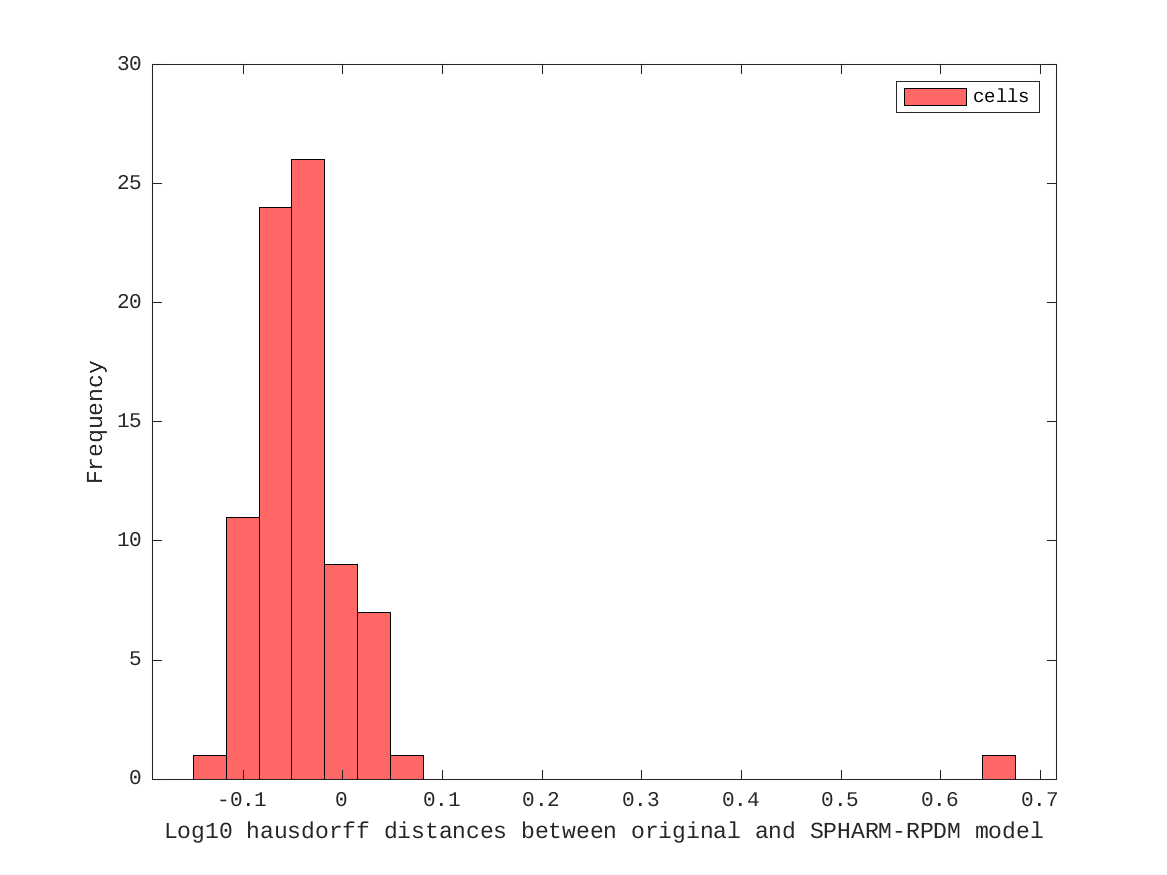

In [3]:
from IPython.core.display import display, HTML, Image
Image('hausdorff_distances_histogram.png')

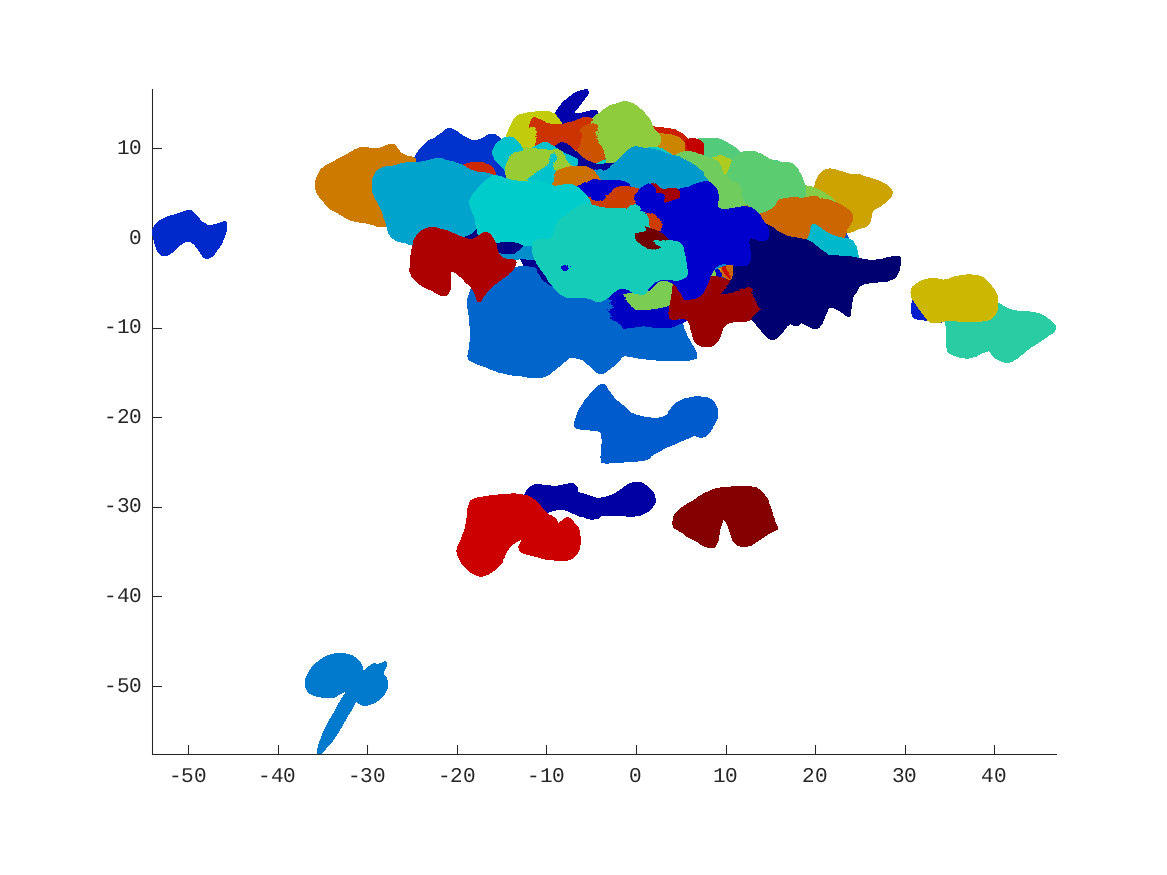

In [4]:
Image('show_shape_space.png')

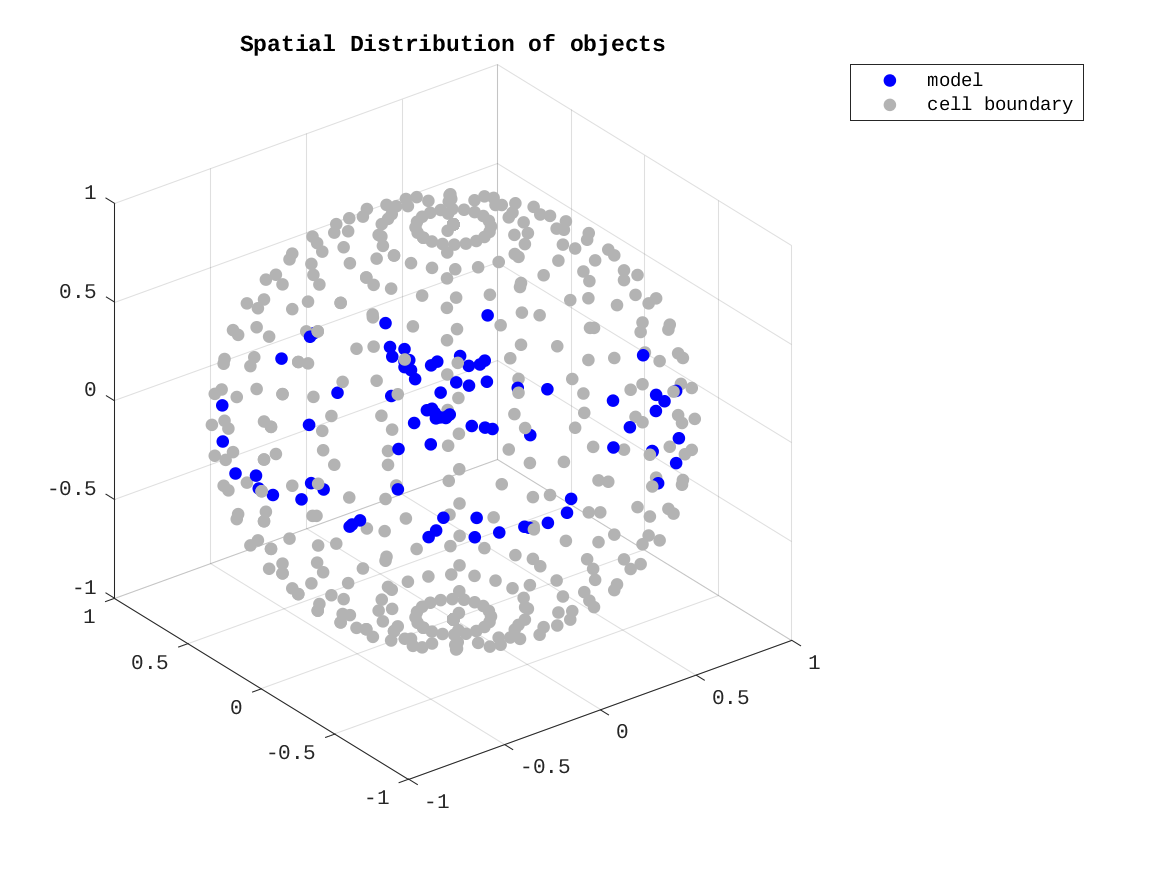

In [5]:
Image('show_spatial_distribution.png')

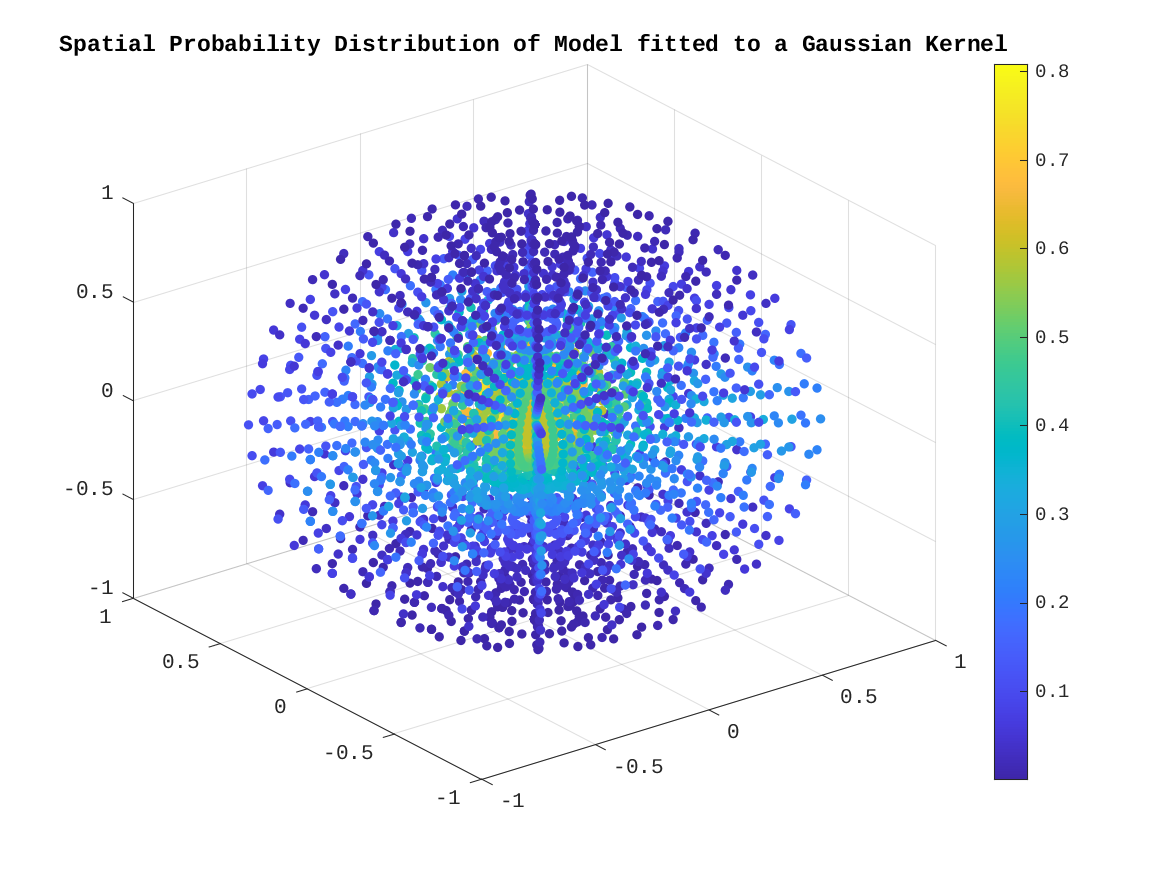

In [6]:
Image('spatial_model_fit.png')